## Download HoneyPot_dataSet

In [ ]:
!wget http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip

--2022-09-16 16:03:16--  http://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Resolving infolab.tamu.edu (infolab.tamu.edu)... 45.55.217.29
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip [following]
--2022-09-16 16:03:17--  https://infolab.tamu.edu/data/social_honeypot_icwsm_2011.zip
Connecting to infolab.tamu.edu (infolab.tamu.edu)|45.55.217.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263659672 (251M) [application/zip]
Saving to: ‘social_honeypot_icwsm_2011.zip’

social_honeypot_icw 100%[===================>] 251.45M  93.1MB/s    in 2.7s    

2022-09-16 16:03:19 (93.1 MB/s) - ‘social_honeypot_icwsm_2011.zip’ saved [263659672/263659672]



In [ ]:
!unzip social_honeypot_icwsm_2011.zip

Archive:  social_honeypot_icwsm_2011.zip
   creating: social_honeypot_icwsm_2011/
  inflating: social_honeypot_icwsm_2011/content_polluters.txt  
   creating: __MACOSX/
   creating: __MACOSX/social_honeypot_icwsm_2011/
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_followings.txt  
  inflating: social_honeypot_icwsm_2011/content_polluters_tweets.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._content_polluters_tweets.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_followings.txt  
  inflating: __MACOSX/social_honeypot_icwsm_2011/._legitimate_users_followings.txt  
  inflating: social_honeypot_icwsm_2011/legitimate_users_tweets.txt  
  inflating: __MACOSX/soci

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re, string

from scipy.stats import zscore
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt

In [ ]:
import timeit
start = timeit.default_timer()

In [ ]:

def func(string):
   return pd.Series(string.split(',')).astype(int)
  
  
dfContent_polluters = pd.read_csv('social_honeypot_icwsm_2011/content_polluters.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"],index_col=0)

dfContent_polluters_followings = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_followings.txt',sep='\t', names=
                 ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":func},index_col=0)

dfContent_polluters_tweets = pd.read_csv('social_honeypot_icwsm_2011/content_polluters_tweets.txt',sep='\t', names=
                 ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)

dfLegitimate_users = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users.txt',sep='\t', names=
                 ["UserID","CreatedAt","CollectedAt","NumberOfFollowings","NumberOfFollowers",
                  "NumberOfTweets","LengthOfScreenName","LengthOfDescriptionInUserProfile"],
                parse_dates=["CreatedAt","CollectedAt"],index_col=0)

dfLegitimate_users_followings = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_followings.txt',sep='\t', names=
                 ["UserID","SeriesOfNumberOfFollowings"],converters={"SeriesOfNumberOfFollowings":func},index_col=0)


dfLegitimate_users_tweets = pd.read_csv('social_honeypot_icwsm_2011/legitimate_users_tweets.txt',sep='\t', names=
                 ["UserID","TweetID","Tweet","CreatedAt"], parse_dates=["CreatedAt"],index_col=0)

In [ ]:
dfLegitimate_users_tweets

,TweetID,Tweet,CreatedAt
UserID,,,
614,5912305459,… at house party in Daybreak. Not as weird as ...,2009-11-20 23:52:52
614,5908467165,Taxiing — at SLC Salt Lake City International...,2009-11-20 20:42:48
614,5904901963,Almost home! — at PDX Portland International ...,2009-11-20 18:11:01
614,5900351610,Lunch! — at Ten01 http://gowal.la/s/Awa,2009-11-20 15:04:42
614,5900312627,Mm … books — at @Powells http://gowal.la/s/6fe,2009-11-20 15:03:06
...,...,...,...
93390990,6168916131,meet me on ELIMINATE pro!!,2009-11-29 06:44:03
93402679,6170059145,my twitter,2009-11-29 07:52:22
93419256,6171947104,exploring this thing...,2009-11-29 09:25:53


In [ ]:
def get_user_id(data_frame) :
  df = pd.DataFrame({"UserID":data_frame["UserID"]})
  return df

## 	Featurse Extraction


### 1 - The	longevity	of	the	account

In [ ]:

def longevity(data_frame) :
  df=pd.DataFrame({"LongevityOfAccount": (data_frame["CollectedAt"]-data_frame["CreatedAt"])/np.timedelta64(1, 'D')})
  return df

### 2 - Average Tweet Length

In [ ]:
def avgTweetLength(data_frame) :
  dftemp=pd.DataFrame({"AvgLengthTweets": data_frame["Tweet"].astype(str).apply(len)})
  df = dftemp.groupby(["UserID"]).mean()
  return df

### 3 -  |ReTweets |  /  |Tweets|

In [ ]:
def existURL(tweet) :
  if(len(re.findall('(RT|retweet|from|via)(?:\b\W*@(\w+))+', str(tweet)))==0):
    return 0;
  else:
    return 1;
  
def reTweetsFraction(data_frame) :
  dftemp=pd.DataFrame({"ReTweetFraction": data_frame["Tweet"].apply(existURL)})
  df = dftemp.groupby(["UserID"]).mean()
  return df


### 4 - |Tweets with URL|  /  |Tweets|

In [ ]:
def existURL(tweet) :
  if(len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', str(tweet)))==0):
    return 0;
  else:
    return 1;
  
def URLsPerTweets(data_frame) :
  dftemp=pd.DataFrame({"AvgTweetsWithURL": data_frame["Tweet"].apply(existURL)})
  df = dftemp.groupby(["UserID"]).mean()
  return df


### 5 - Average time between 2 consecutives tweets

In [ ]:
def avgTimeBetween2Tweets(data_frame):
  temp=pd.DataFrame({"CreatedAt":data_frame["CreatedAt"]}).sort_values(by=['UserID','CreatedAt'])
  dftemp=pd.DataFrame({"PreviousTweet":temp.groupby(['UserID']).apply(lambda x:x)['CreatedAt'],
                       "NextTweet":temp.groupby(['UserID']).shift(-1)['CreatedAt']})
  df=pd.DataFrame({"AvgMinutesBetween2Tweets": (dftemp["NextTweet"]-dftemp["PreviousTweet"]) / np.timedelta64(1, 'm')})
  df=df.groupby(["UserID"]).mean()
  return df

### 6 -  Followings / Followers

In [ ]:
def fractionFF(data_frame) :
  df = pd.DataFrame({"RatioFollowings/Followers": (data_frame["NumberOfFollowings"] / data_frame["NumberOfFollowers"]) })
  return df 

### 7 - The standard	deviation	of unique	numerical	IDs	of following

In [ ]:
def std(x):
  return x.std()

def followingsSTD(data_frame) :
  df = pd.DataFrame({"STDOfUniqueFollowers":data_frame["SeriesOfNumberOfFollowings"].apply(std)})
  return df

In [ ]:
followingsSTD(dfContent_polluters_followings)

,STDOfUniqueFollowers
UserID,
6301,189.834956
10836,11.384581
10997,859.067567
633293,284.877349
717883,114.229063
...,...
173715049,64.468985
173718053,47.518417
173721018,53.909647


### 8 - Number of tweets / day

In [ ]:
def numberOfTweetsPerDay(data_frame) :
  dftemp = pd.DataFrame({"CreatedAt":data_frame["CreatedAt"].dt.date})
  query=dftemp.groupby(["UserID","CreatedAt"]).size()
  query2=query.groupby(["UserID"]).mean().reset_index(name='0')
  df = pd.DataFrame({"UserID":query2["UserID"],"NumberOfTweetsPerDay":query2["0"]})
  df=df.set_index("UserID")
  return df


### 9 - Average mentions / Tweet

In [ ]:
def countM(tweet):
  return len(re.findall('\s([@#][\w_-]+)', str(tweet)))

def mentionsPerTweets(data_frame):
  dftemp=pd.DataFrame({"AvgMentionsPerTweet": data_frame["Tweet"].apply(countM)})
  df = dftemp.groupby(["UserID"]).mean()
  return df

### 4 - Numbers of followings

In [ ]:
def nbrFollowings(data_frame) :
  df = pd.DataFrame({"NumberOfFollowings":data_frame["NumberOfFollowings"]})
  return df

### 5 - Numbers of followers

In [ ]:
def nbrFollowers(data_frame) :
  df = pd.DataFrame({"NumberOfFollowers":data_frame["NumberOfFollowers"]})
  return df

In [ ]:

first_features_polluters=pd.concat([longevity(dfContent_polluters),
                                    nbrFollowings(dfContent_polluters), 
                                    followingsSTD(dfContent_polluters_followings),
                                    mentionsPerTweets(dfContent_polluters_tweets),
                                    reTweetsFraction(dfContent_polluters_tweets),
                                    avgTweetLength(dfContent_polluters_tweets),
                                    URLsPerTweets(dfContent_polluters_tweets),
                                    numberOfTweetsPerDay(dfContent_polluters_tweets),
                                    avgTimeBetween2Tweets(dfContent_polluters_tweets)],axis=1)

first_features_legitimate=pd.concat([longevity(dfLegitimate_users),
                                    nbrFollowings(dfLegitimate_users),
                                    followingsSTD(dfLegitimate_users_followings),
                                    mentionsPerTweets(dfLegitimate_users_tweets),
                                    reTweetsFraction(dfLegitimate_users_tweets),
                                    avgTweetLength(dfLegitimate_users_tweets),
                                    URLsPerTweets(dfLegitimate_users_tweets),
                                    numberOfTweetsPerDay(dfLegitimate_users_tweets),
                                    avgTimeBetween2Tweets(dfLegitimate_users_tweets)],axis=1)

## Label Honey Pot dataSet

In [ ]:
data_set_polluters = first_features_polluters
data_set_legitimate = first_features_legitimate

In [ ]:
data_set_polluters.insert(0,"Class",1)
data_set_legitimate.insert(0,"Class",0)

## Clean Data

In [ ]:
def attributesOfUniqueValues(data_set_users) :
  list=[]
  for col in data_set_users.columns:
    if (data_set_users[col]==data_set_users[col].iloc[0]).all == True:
      list.append(col)
  return data_set_users.drop(list)

In [ ]:
def duplicateRows(data_set_users):
  return data_set_users.drop_duplicates()

In [ ]:
def missingValues(data_set_users):
  valuesReplaced = data_set_users.replace([np.inf,-np.inf],np.nan)
  valuesReplaced.fillna(0,inplace=True)
  return valuesReplaced

In [ ]:
def shiftCol(data_set_users):
  df=data_set_users.drop(["Class"],axis=1)
  # df=df.apply(zscore)
  df["Class"]=data_set_users["Class"]
  return df

In [ ]:
data_set_polluters=attributesOfUniqueValues(data_set_polluters)
data_set_polluters=duplicateRows(data_set_polluters)
data_set_polluters=missingValues(data_set_polluters)
data_set_polluters=shiftCol(data_set_polluters)

In [ ]:
data_set_legitimate=attributesOfUniqueValues(data_set_legitimate)
data_set_legitimate=duplicateRows(data_set_legitimate)
data_set_legitimate=missingValues(data_set_legitimate)
data_set_legitimate=shiftCol(data_set_legitimate)

In [ ]:
data_set=pd.concat([data_set_polluters,data_set_legitimate])

In [ ]:
X=data_set.drop(['Class'],axis=1)
X=X.values
Y=data_set["Class"].values
train, test, target, trueResult = train_test_split(X, Y, test_size=0.3, random_state=1)

**Application des Algorithmes**



> Random Forest



In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix,make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import pickle

In [ ]:

# Random Forest
randomForestModel = RandomForestClassifier(n_estimators=100)
randomForestModel.fit(train, target)
predictedRF = randomForestModel.predict(test)
probasRF = randomForestModel.predict_proba(test)

In [ ]:

from sklearn.metrics import confusion_matrix as cm
target_names = ['Real Account','Fake Account']
confusion_matrix = cm(trueResult, predictedRF)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.93039079 0.06960921]
 [0.04971718 0.95028282]]


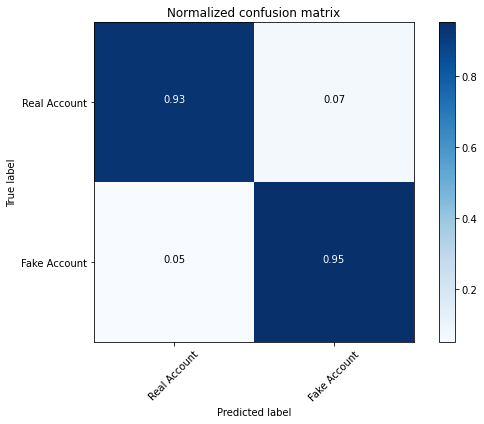

In [ ]:


#Plot the confusion matrix
import itertools
plt.figure(figsize=(8,6))
plot_confusion_matrix(confusion_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# # knn
decisionTree = KNeighborsClassifier(n_neighbors=5)
decisionTree.fit(train, target)
predictedAD = decisionTree.predict(test)
probasAD = decisionTree.predict_proba(test)

Precision: 0.9070
Recall: 0.9025
F-mesure: 0.9047
Surface sous la courbe ROC: 0.8970


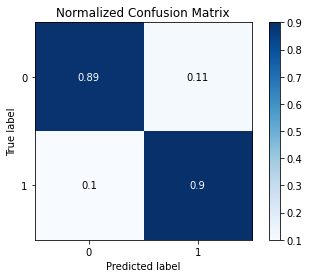

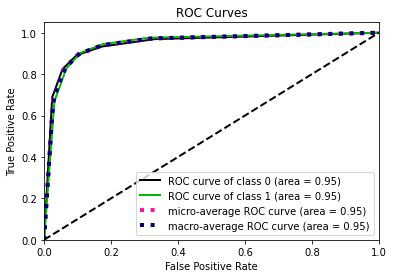

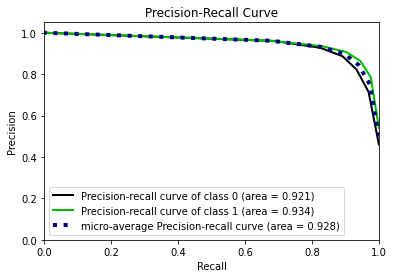

In [ ]:
precisionAD = precision_score(trueResult, predictedAD)
recallAD = recall_score(trueResult, predictedAD)
fmeasureAD = f1_score(trueResult, predictedAD)
fprAD, tprAD, thresholdsAD = roc_curve(trueResult, predictedAD)
rocAD = metrics.auc(fprAD, tprAD)
print("Precision: %0.4f" % precisionAD)
print("Recall: %0.4f" % recallAD)
print("F-mesure: %0.4f" % fmeasureAD)
print("Surface sous la courbe ROC: %0.4f" % rocAD)
skplt.metrics.plot_confusion_matrix(trueResult, predictedAD, normalize=True)
skplt.metrics.plot_roc(trueResult, probasAD)
skplt.metrics.plot_precision_recall(trueResult, probasAD)

In [ ]:
precisionRF = precision_score(trueResult, predictedRF)
recallRF = recall_score(trueResult, predictedRF)
fmeasureRF = f1_score(trueResult, predictedRF)
fprRF, tprRF, thresholdsRF = roc_curve(trueResult, predictedRF)
rocRF = metrics.auc(fprRF, tprRF)
print("Precision: %0.4f" % precisionRF)
print("Recall: %0.4f" % recallRF)
print("F-mesure: %0.4f" % fmeasureRF)
print("Surface sous la courbe ROC: %0.4f" % rocRF)
skplt.metrics.plot_confusion_matrix(trueResult, predictedRF, normalize=True)
skplt.metrics.plot_roc(trueResult, probasRF)
skplt.metrics.plot_precision_recall(trueResult, probasRF)

In [ ]:
stop = timeit.default_timer()
print('Time: ', stop - start) 

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(randomForestModel, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test)
print(result)

In [ ]:
print(test[1])

In [ ]:
newdata =[ 1.105 , 33.   , 3.20223958 , 0.     ,     0.     ,    77.47368421 , 0.   ,       9.5     ,   86.45740741]
resultnewdata = loaded_model.predict([newdata])
print(resultnewdata[0])

In [ ]:
score = loaded_model.score(test, trueResult)
print(" score " , score)

In [ ]:
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(" result " , result)